<a href="https://colab.research.google.com/github/Roshani-Abeysekera/Forecasting-Monthly-Dengue-Cases-Using-Climatic-Factors-In-Colombo-District-With-Machine-Learning./blob/main/Multiple_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from random import seed
from random import randrange
from csv import reader
from math import sqrt

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

import sklearn
#assert sklearn_version_>="0.20"
from sklearn import linear_model

%matplotlib inline
from IPython.display import HTML
from numpy import *

from google.colab import files
data_to_load = files.upload()

Saving dengue.csv to dengue (1).csv


In [ ]:
import io
data = pd.read_csv(io.BytesIO(data_to_load['dengue.csv']))

In [ ]:
df = pd.DataFrame(data,columns=['Year','Month','Temp 0C','Rainfall (mm)','Humidity (%)','Dengue Victims']) 

print (df)

    Year  Month  Temp 0C  Rainfall (mm)  Humidity (%)  Dengue Victims
0   2016      1       27          33.74            74            2184
1   2016      2       28          33.92            73            1569
2   2016      3       28          41.27            74            1016
3   2016      4       29         101.74            77             942
4   2016      5       28         655.50            83             693
5   2016      6       27         351.98            86            1459
6   2016      7       27         191.54            85            3191
7   2016      8       27         201.60            85            1478
8   2016      9       26          88.61            85             939
9   2016     10       27          55.06            79             459
10  2016     11       27         112.16            79             460
11  2016     12       26          55.57            76            2377
12  2017      1       26          43.68            72            2734
13  2017      2     

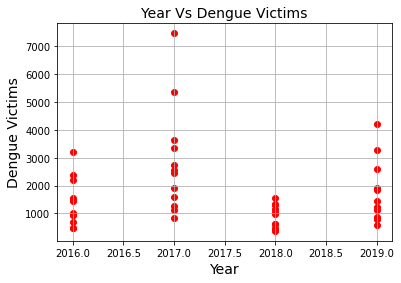

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(df['Year'], df['Dengue Victims'], color='red')
plt.title('Year Vs Dengue Victims', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Dengue Victims', fontsize=14)
plt.grid(True)
plt.show()

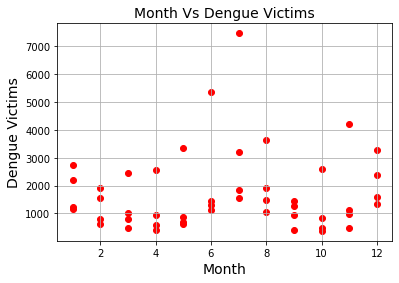

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(df['Month'], df['Dengue Victims'], color='red')
plt.title('Month Vs Dengue Victims', fontsize=14)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Dengue Victims', fontsize=14)
plt.grid(True)
plt.show()

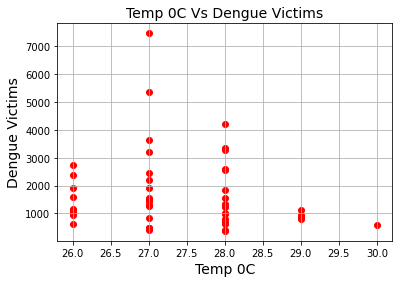

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(df['Temp 0C'], df['Dengue Victims'], color='red')
plt.title('Temp 0C Vs Dengue Victims', fontsize=14)
plt.xlabel('Temp 0C', fontsize=14)
plt.ylabel('Dengue Victims', fontsize=14)
plt.grid(True)
plt.show()

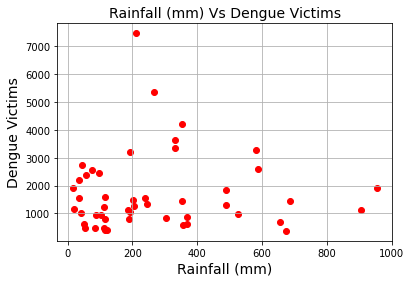

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(df['Rainfall (mm)'], df['Dengue Victims'], color='red')
plt.title('Rainfall (mm) Vs Dengue Victims', fontsize=14)
plt.xlabel('Rainfall (mm)', fontsize=14)
plt.ylabel('Dengue Victims', fontsize=14)
plt.grid(True)
plt.show()

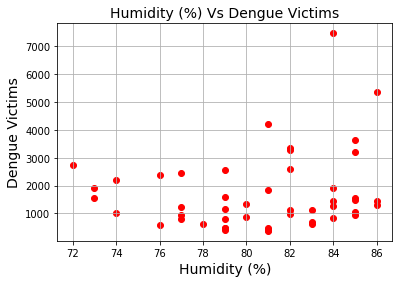

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(df['Humidity (%)'], df['Dengue Victims'], color='red')
plt.title('Humidity (%) Vs Dengue Victims', fontsize=14)
plt.xlabel('Humidity (%)', fontsize=14)
plt.ylabel('Dengue Victims', fontsize=14)
plt.grid(True)
plt.show()

In [ ]:
from sklearn import linear_model
import statsmodels.api as sm
X = df[['Year','Month','Temp 0C','Rainfall (mm)','Humidity (%)']] # here we have 2 variables for multiple regression. If you just want to use one variable for simple linear regression, then use X = df['Interest_Rate'] for example.Alternatively, you may add additional variables within the brackets
Y = df['Dengue Victims']
 
# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X, Y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

# prediction with sklearn
New_Year = 2020
New_Month = 2
New_Tem = 28
New_Rainfall = 41.0
New_Humidity= 80
print ('Predicted Dengue Victims: \n', regr.predict([[New_Year,New_Month,New_Tem,New_Rainfall,New_Humidity]]))

# with statsmodels
X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Intercept: 
 177738.11016867647
Coefficients: 
 [-8.81987819e+01 -1.00492600e+01 -1.24521996e+02  6.55795770e-02
  6.65977674e+01]
Predicted Dengue Victims: 
 [1400.36648175]
                            OLS Regression Results                            
Dep. Variable:         Dengue Victims   R-squared:                       0.049
Model:                            OLS   Adj. R-squared:                 -0.064
Method:                 Least Squares   F-statistic:                    0.4305
Date:                Sat, 27 Mar 2021   Prob (F-statistic):              0.825
Time:                        06:53:40   Log-Likelihood:                -413.59
No. Observations:                  48   AIC:                             839.2
Df Residuals:                      42   BIC:                             850.4
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err